# MORPHOLOGICAL OPERATIONS

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d    

import numpy as np
import plot

plt.style.use('dark_background') 
%matplotlib inline

PATH = '/Users/cmedina/Documents/cm/ufm/cv/cv/clases_diarias/im/'

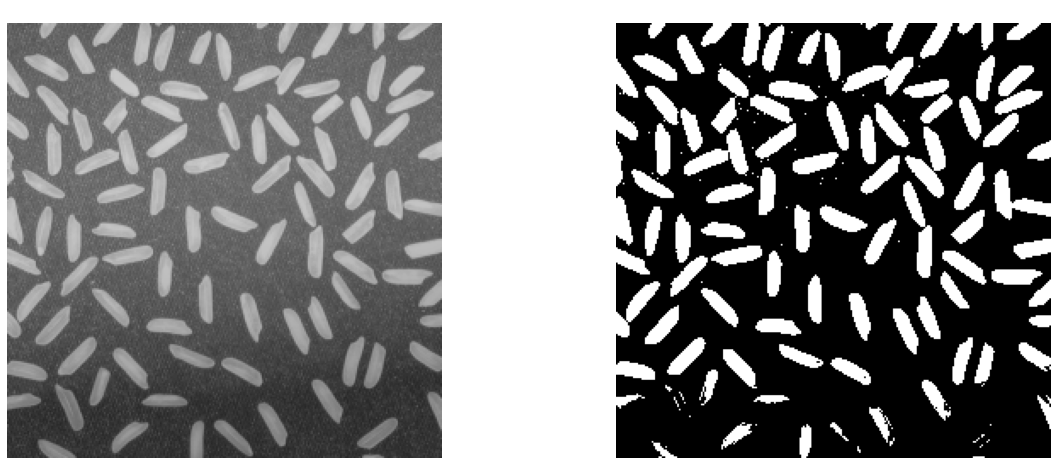

In [2]:
img = cv.imread(PATH+'subimage.pgm', cv.IMREAD_GRAYSCALE)
img = cv.imread(PATH+'rice.png', cv.IMREAD_GRAYSCALE)
thresh, img_bin = cv.threshold(img, 70, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)


#img = cv.imread(PATH+'coins.jpeg', cv.IMREAD_GRAYSCALE)
#thresh, img_bin = cv.threshold(img, 200, 255, cv.THRESH_BINARY) #+cv.THRESH_OTSU)
#img_bin = 255 - img_bin

plot.imgcmp(img,img_bin,title=['Orignal','Binarized at {0}'.format(thresh)])

# Kernel or Structuring Element


In [24]:
kernel_cross = np.array([[  0, 255,  0],
                         [255, 255, 255],
                         [  0, 255,  0]], np.uint8)

kernel_vertical = np.array([[  0, 0,  255, 0, 0],
                            [  0, 0,  255, 0, 0],
                            [  0, 0,  255, 0, 0],
                            [  0, 0,  255, 0, 0],
                            [  0, 0,  255, 0, 0]], np.uint8)
kernel = kernel_cross
#kernel = 255*cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

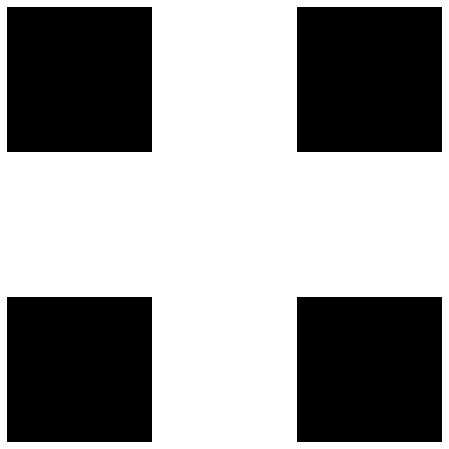

In [25]:
plot.imgview(kernel)

# Erosion
- The kernel slides through the image entire image
- It acts over the central pixel position
- The pixel in the original image (either 255 or 0) will be unmodified (255) only if all the pixels under the kernel are 255, (AND operation) 
- Otherwise the pixel is set to 0 

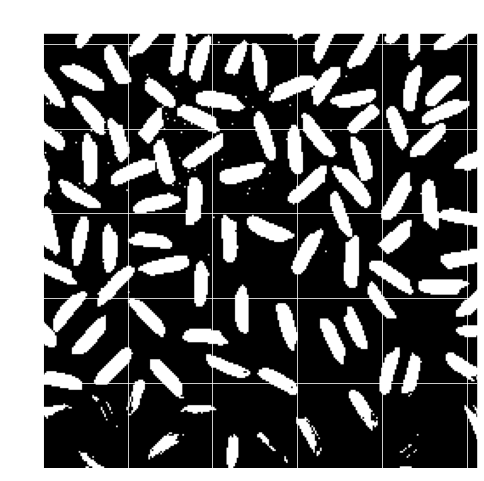

In [5]:
plot.imgview(img_bin, show_axis=True)

In [6]:
erosion = cv.erode(img_bin, kernel, iterations=1)

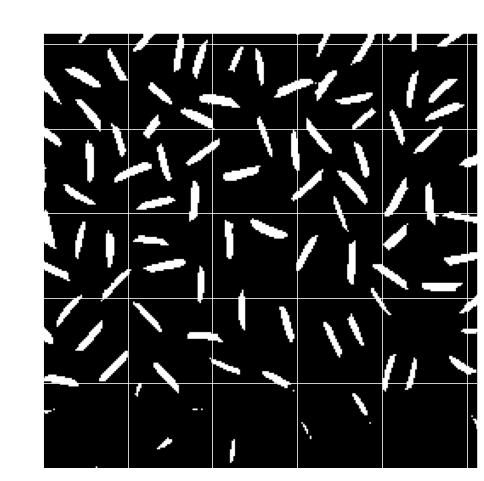

In [7]:
plot.imgview(erosion, show_axis=True)

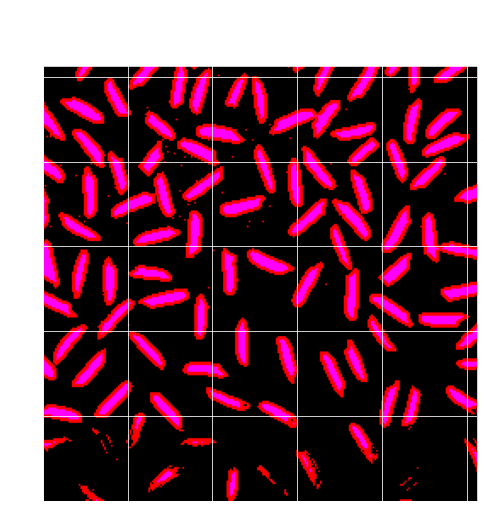

In [8]:
def morphcmp(original, result, title=None):
    r,c = original.shape[0:2]
    cmp = np.zeros((r,c,3), np.uint)
    cmp[:,:,0] = original
    cmp[:,:,2] = result
    plot.imgview(cmp, title=title, show_axis=True)
    
morphcmp(img_bin, erosion,'Erosion - Cross Kernel\nRed: Original | Magenta: Eroded')

In [9]:
kernel_vertical = np.array([[ 0, 255, 0],
                            [  0, 255, 0],
                            [  0, 255, 0],
                            [  0, 255, 0],
                            [  0, 255, 0],
                            [  0, 255, 0],                        
                            [  0, 255, 0],
                            [  0, 255, 0],
                            [  0, 255, 0],
                            [  0, 255, 0],
                            [  0, 255, 0],
                            [  0, 255, 0],                                                                                                                
                            [  0, 255, 0]], np.uint8)

kernel = kernel_vertical

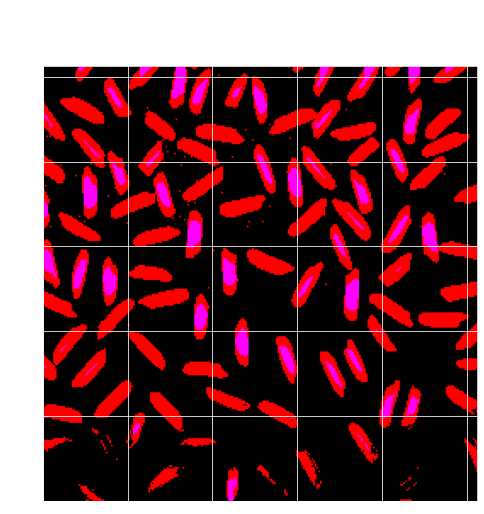

In [10]:
morphcmp(img_bin, cv.erode(img_bin, kernel, iterations = 1),
         title='Erosion - Vertical Kernel\nRed: Original | Magenta: Eroded')

# Dilation
- Oposite of erosion
- A pixel element is set to 255 if atleast one pixel under the kernel is 255.(OR operation)
- Expands white pixels

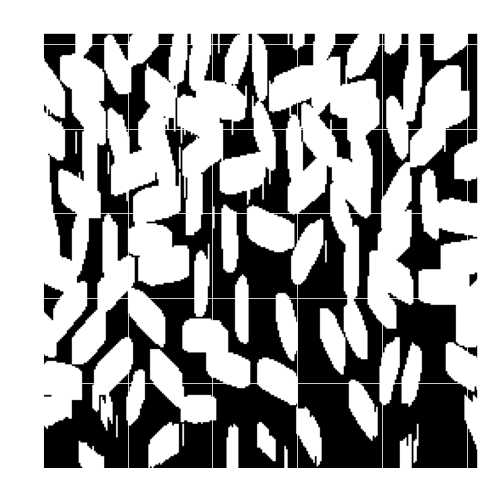

In [11]:
# kernel = 
dilation = cv.dilate(img_bin, kernel, iterations = 1)
plot.imgview(dilation,show_axis=True)

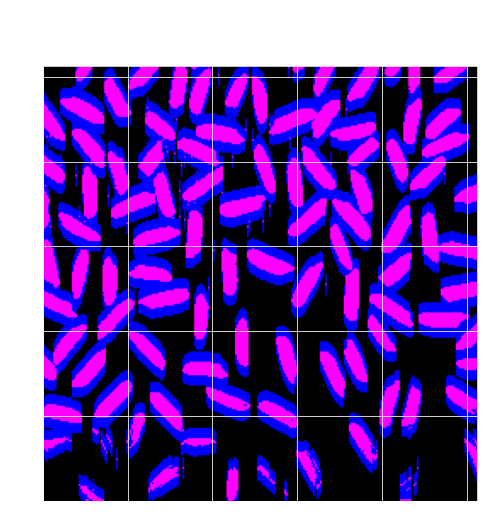

In [12]:
morphcmp(img_bin, dilation,
         title='Dilation - Cross Kernel\nMagenta: Original | Blue: Dilated')

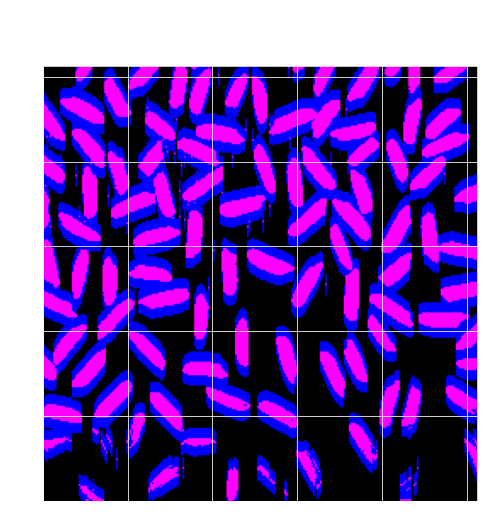

In [13]:
kernel = kernel_vertical
morphcmp(img_bin,cv.dilate(img_bin, kernel, iterations = 1),
         title='Dilation - Cross Kernel\nMagenta: Original | Blue: Dilated')

# OPENING
- Just another name of an erosion followed by a dilation

In [14]:
# kernel = kernel_cross
opening = cv.morphologyEx(img_bin, cv.MORPH_OPEN, kernel)

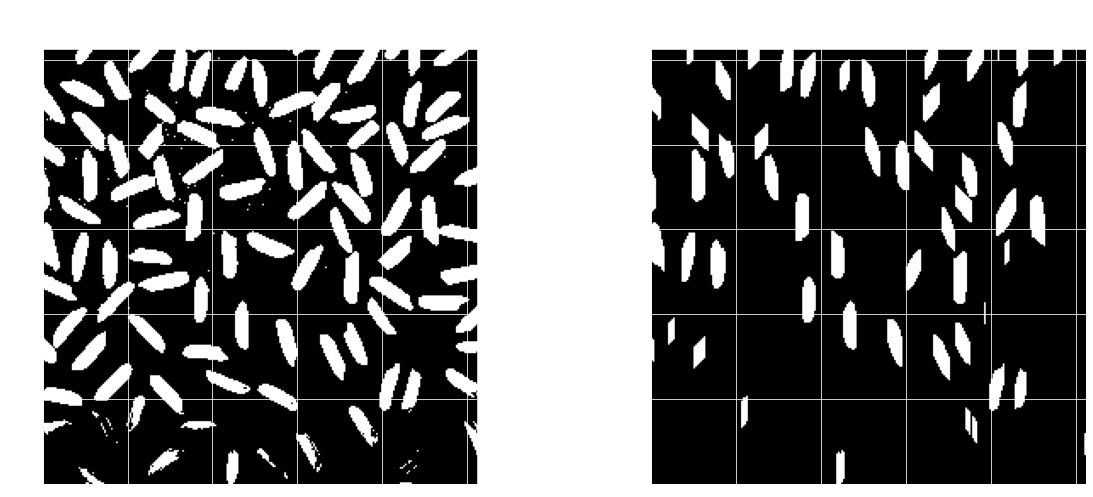

In [15]:
# salt & pepper noise

# cleans salt
plot.imgcmp(img_bin, opening, title=['Original','Opening'], show_axis=True)

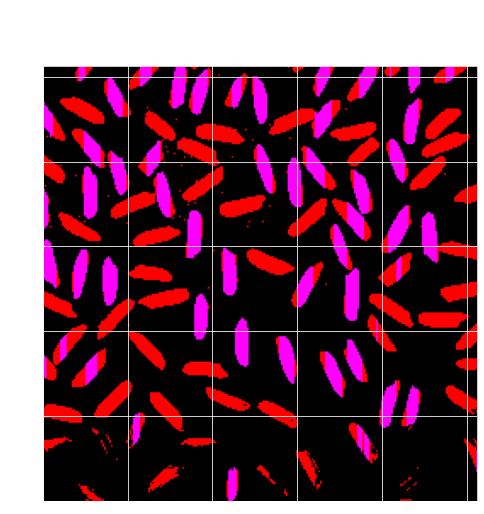

In [16]:
morphcmp(img_bin, opening,title='Opening - Cross Kernel\nRed: Original | Magenta: Opening')

# Closing
- Oposite of Opening, Dilation followed by Erosion

In [17]:

closing = cv.morphologyEx(img_bin, cv.MORPH_CLOSE, kernel)

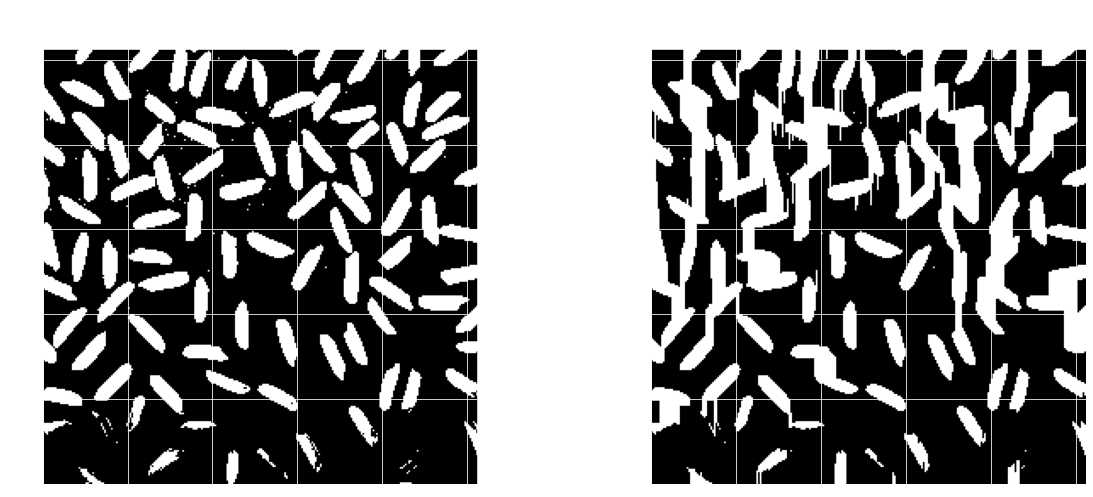

In [18]:
plot.imgcmp(img_bin, closing, title=['Original','Closing'], show_axis=True)

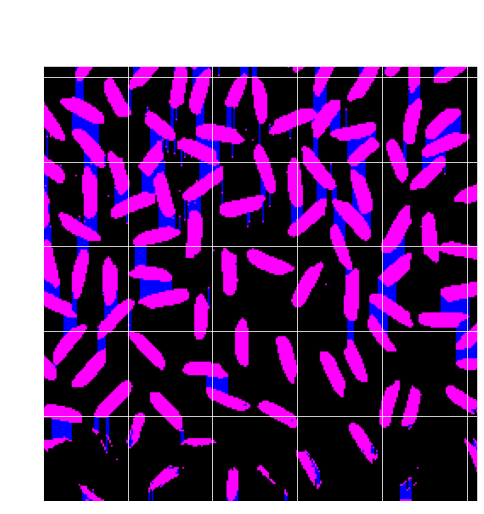

In [19]:
morphcmp(img_bin, closing,
        title='Opening - Cross Kernel\nMagenta: Original | Blue: Closing')

# Other morphological operators
## Morphological Gradient: Dilation - Erosion

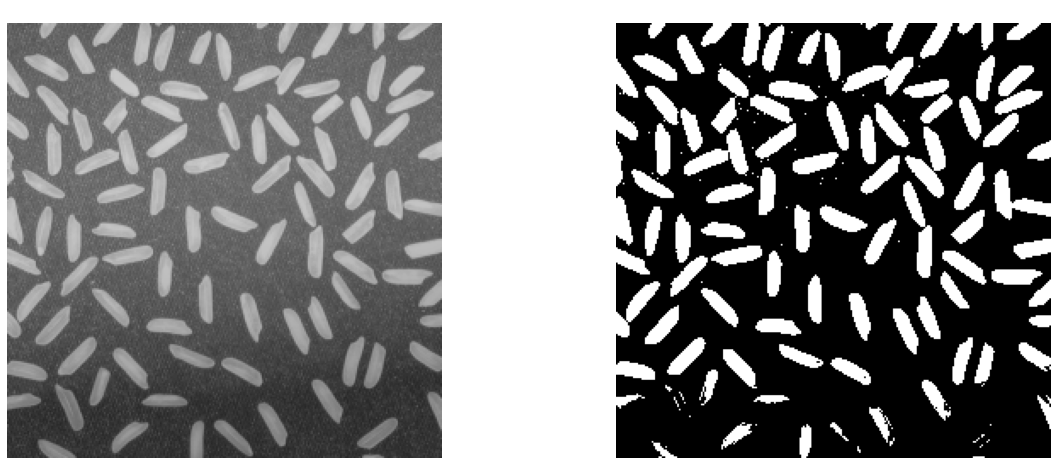

In [20]:
# img = cv.imread(PATH+'hands.jpg', cv.IMREAD_GRAYSCALE)
# thresh, img_bin = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
# img_bin = 255 - img_bin
plot.imgcmp(img,img_bin,title=['Orignal','Binarized at {0}'.format(thresh)])

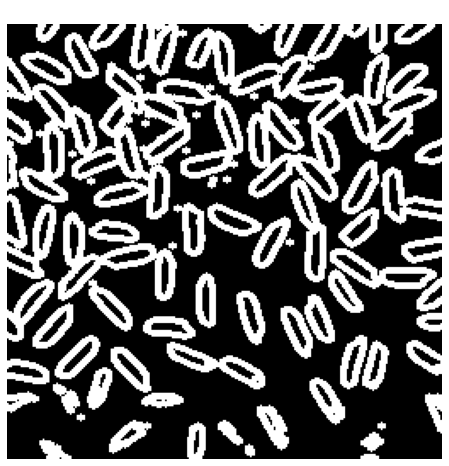

In [21]:
# other kernel shapes
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

# Dilation - Erosion
gradient = cv.morphologyEx(img_bin, cv.MORPH_GRADIENT, kernel)
plot.imgview(gradient, title='Morphological Gradient',show_axis=False)

- Top Hat: Difference between input image and Opening of the image.
- Black Hat: Difference between the closing of the input image and input image

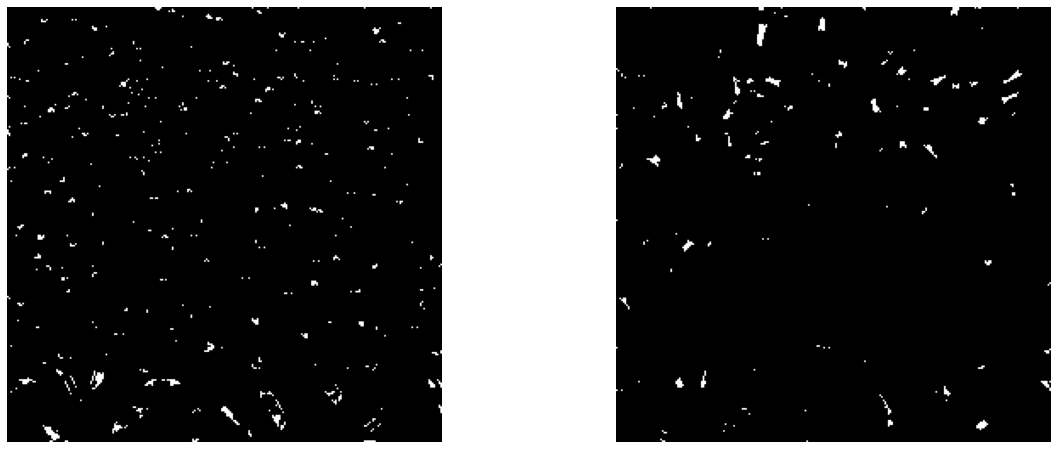

In [22]:
top_hat = cv.morphologyEx(img_bin, cv.MORPH_TOPHAT, kernel)
black_hat = cv.morphologyEx(img_bin, cv.MORPH_BLACKHAT, kernel)

plot.imgcmp(top_hat, black_hat)